In [ ]:
import os
import tensorflow.keras as keras
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import pickle as p
import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Input, Masking

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SimpleRNN, Masking, Input, Activation
from tensorflow.keras.activations import softmax
import tensorflow as tf

In [ ]:
#Path for dta load

path = "/content/drive/MyDrive/DLA6/Handwriting_Data01"
os.listdir(path)

['bA', 'chA', 'ai', 'tA', 'dA']

In [ ]:
#Read Data

In [ ]:
def read_data(path):
    tr_path = path+'/train/'
    test_path = path+'/dev/'
    train = pd.concat([pd.read_csv(tr_path+i, sep=" ", header=None) for i in os.listdir(tr_path)])
    test = pd.concat([pd.read_csv(test_path+i, sep=" ", header=None) for i in os.listdir(test_path)])
    return train, test

In [ ]:
tr_ai, test_ai= read_data(path+'/ai')
tr_bA, test_bA= read_data(path+'/bA')
tr_chA, test_chA= read_data(path+'/chA')
tr_dA, test_dA= read_data(path+'/dA')
tr_tA, test_tA= read_data(path+'/tA')

In [ ]:
#Data Preprocessing

In [ ]:
tr_chA.drop(0, inplace=True, axis=1)
tr_dA.drop(0, inplace=True, axis=1)
tr_ai.drop(0, inplace=True, axis=1)
tr_bA.drop(0, inplace=True, axis=1)
tr_tA.drop(0, inplace=True, axis=1)

test_chA.drop(0, inplace=True, axis=1)
test_dA.drop(0, inplace=True, axis=1)
test_ai.drop(0, inplace=True, axis=1)
test_bA.drop(0, inplace=True, axis=1)
test_tA.drop(0, inplace=True, axis=1)

tr_ai=tr_ai.dropna(axis=1,how='all')
test_ai=test_ai.dropna(axis=1,how='all')
tr_bA=tr_bA.dropna(axis=1,how='all')
test_bA=test_bA.dropna(axis=1,how='all')
tr_chA=tr_chA.dropna(axis=1,how='all')
test_chA=test_chA.dropna(axis=1,how='all')
tr_dA=tr_dA.dropna(axis=1,how='all')
test_dA=test_dA.dropna(axis=1,how='all')
tr_tA=tr_tA.dropna(axis=1,how='all')
test_tA=test_tA.dropna(axis=1,how='all')


#import pandas as pd
tr_data = pd.concat([tr_chA, tr_tA, tr_ai, tr_bA, tr_dA])
test_data = pd.concat([test_chA, test_tA, test_ai, test_bA, test_dA])
# save to training.csv file
#tr_data.to_csv('training.csv', index=False)


nan_list=[np.nan]*test_data.shape[0]

for i in range(test_data.shape[1],tr_data.shape[1]+1):
    test_data[i]=nan_list

tr_data=tr_data.replace(np.nan,0)
test_data=test_data.replace(np.nan,0)    

In [ ]:
df =tr_data
# Create an empty list to store the x, y point pairs
tr = []


# Loop over each row in the DataFrame
for index, row in df.iterrows():
    # Create a list to store the x, y pairs for this row
    point_row = []
    
    
    # Loop over each value in the row, skipping the first column
    for i in range(1, len(row), 2):
        # Get the x, y pair for this point
        x = row[i]
        y = row[i+1]
        l=[]
        #print(type(x))
        l.append(x)
        l.append(y)
        l=np.array(l,dtype=np.float32)
        # Add the x, y pair to the list for this row
        point_row.append(l)
    
    # Add the list of x, y pairs for this row to the points list
    tr.append(point_row)

# Create a new DataFrame from the points list
train = pd.DataFrame(tr)

# Save the new DataFrame to a CSV file
#df_points.to_csv('testHw.csv', index=False, header=False)

In [ ]:
df =test_data
# Create an empty list to store the x, y point pairs
tst = []


# Loop over each row in the DataFrame
for index, row in df.iterrows():
    # Create a list to store the x, y pairs for this row
    point_row = []
    
    
    # Loop over each value in the row, skipping the first column
    for i in range(1, len(row), 2):
        # Get the x, y pair for this point
        x = row[i]
        y = row[i+1]
        l=[]
        #print(type(x))
        l.append(x)
        l.append(y)
        l=np.array(l,dtype=np.float32)
        # Add the x, y pair to the list for this row
        point_row.append(l)
    
    # Add the list of x, y pairs for this row to the points list
    tst.append(point_row)

# Create a new DataFrame from the points list
test = pd.DataFrame(tst)

# Save the new DataFrame to a CSV file
#df_points.to_csv('testHw.csv', index=False, header=False)


# Load the CSV file into a pandas DataFrame
trainLabel = pd.read_csv('/content/drive/MyDrive/DLA6/label1.csv')

# Drop a specific label (column)
trainLabel = trainLabel.drop('label', axis=1)
# Save the modified DataFrame back to a new CSV file
#trainLabel.to_csv('/content/drive/MyDrive/modified_file_train.csv', index=False)

# Load the CSV file into a pandas DataFrame
Test_label = pd.read_csv('/content/drive/MyDrive/DLA6/Test_label1.csv')

# Drop a specific label (column)
Test_label = Test_label.drop('label', axis=1)

yt=trainLabel.values
ytest=Test_label.values

tensortest=tf.convert_to_tensor(tst)

tensortrain=tf.convert_to_tensor(tr)



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_1 (Masking)         (None, 161, 2)            0         
                                                                 
 lstm_3 (LSTM)               (None, 161, 32)           4480      
                                                                 
 lstm_4 (LSTM)               (None, 161, 32)           8320      
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 5)                 165       
                                                                 
Total params: 21,285
Trainable params: 21,285
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 [==============================] 

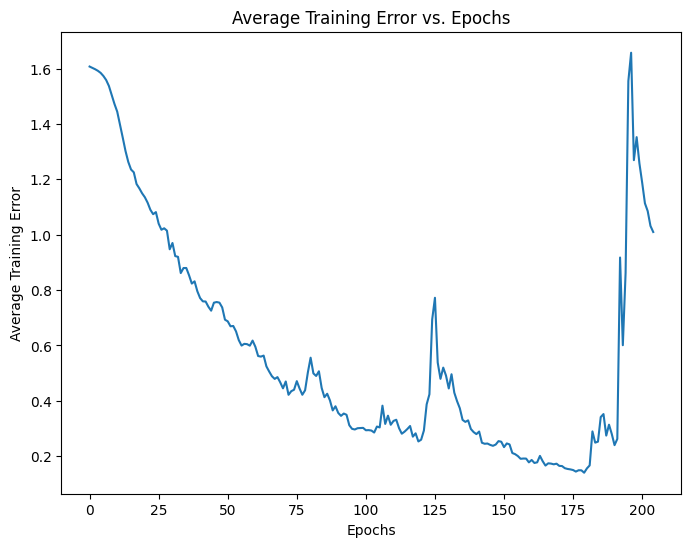

In [ ]:
es1= EarlyStopping(monitor='loss',min_delta=0.0001, patience=25,verbose=1)
#Model Architecture1
mask_value=0.0
model1 = Sequential()
model1.add(Masking(mask_value=mask_value, input_shape=(161, 2)))
model1.add(LSTM(units=32,return_sequences=True))
#model1.add(Dropout(0.2))
model1.add(LSTM(units=32,return_sequences=True))
#model1.add(Dropout(0.2))
model1.add(LSTM(units=32))
#model1.add(Dropout(0.2))
model1.add(Dense(units=5, activation='softmax'))
model1.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model1.summary()
history1=model1.fit(tensortrain, yt, callbacks=[es1],epochs=1000, batch_size=128)

#save Model weights
model1.save('/content/drive/MyDrive/DLA6/CV_SAVE_Model/lstm1.h5')

#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc1=model1.evaluate(x=tensortrain,y=yt,batch_size=1, verbose="auto",callbacks=None)
print(model1.metrics_names)
print(trainAcc1)
print('\nEvaluation of model on test data:')
testAcc1=model1.evaluate(x=tensortest, y=ytest, batch_size=1, verbose="auto",callbacks=None)
print(model1.metrics_names)
print(testAcc1)


#Confusion Matrix
print('\nPredictions for test data:')
testProb1=model1.predict(tensortest, batch_size=1, verbose="auto", callbacks=None)
pred1=np.argmax(testProb1,axis=1)
confusionMatrix1=tf.math.confusion_matrix(ytest,pred1)
print(confusionMatrix1)


#Average Training Error vs. Epochs plotting
plt.figure(figsize=(8, 6))
#plt.plot(history8.history['accuracy'])
plt.plot(history1.history['loss'])
plt.title('Average Training Error vs. Epochs')
plt.ylabel('Average Training Error')
plt.xlabel('Epochs')
plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_2 (Masking)         (None, 161, 2)            0         
                                                                 
 lstm_6 (LSTM)               (None, 161, 32)           4480      
                                                                 
 dropout_3 (Dropout)         (None, 161, 32)           0         
                                                                 
 lstm_7 (LSTM)               (None, 161, 32)           8320      
                                                                 
 dropout_4 (Dropout)         (None, 161, 32)           0         
                                                                 
 lstm_8 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_5 (Dropout)         (None, 32)               

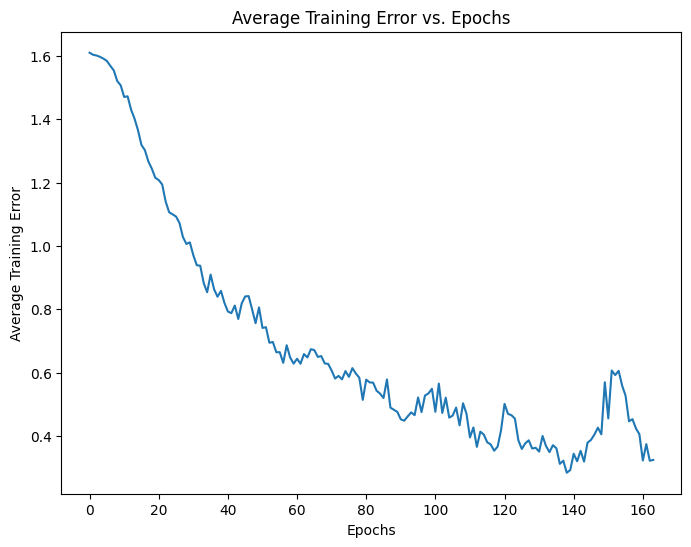

In [ ]:
es1= EarlyStopping(monitor='loss',min_delta=0.0001, patience=25,verbose=1)
#Model Architecture1
mask_value=0.0
model1 = Sequential()
model1.add(Masking(mask_value=mask_value, input_shape=(161, 2)))
model1.add(LSTM(units=32,return_sequences=True))
model1.add(Dropout(0.2))
model1.add(LSTM(units=32,return_sequences=True))
model1.add(Dropout(0.2))
model1.add(LSTM(units=32))
model1.add(Dropout(0.2))
model1.add(Dense(units=5, activation='softmax'))
model1.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model1.summary()
history1=model1.fit(tensortrain, yt, callbacks=[es1],epochs=1000, batch_size=128)

#save Model weights
model1.save('/content/drive/MyDrive/DLA6/CV_SAVE_Model/lstm1.h5')

#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc1=model1.evaluate(x=tensortrain,y=yt,batch_size=1, verbose="auto",callbacks=None)
print(model1.metrics_names)
print(trainAcc1)
print('\nEvaluation of model on test data:')
testAcc1=model1.evaluate(x=tensortest, y=ytest, batch_size=1, verbose="auto",callbacks=None)
print(model1.metrics_names)
print(testAcc1)


#Confusion Matrix
print('\nPredictions for test data:')
testProb1=model1.predict(tensortest, batch_size=1, verbose="auto", callbacks=None)
pred1=np.argmax(testProb1,axis=1)
confusionMatrix1=tf.math.confusion_matrix(ytest,pred1)
print(confusionMatrix1)


#Average Training Error vs. Epochs plotting
plt.figure(figsize=(8, 6))
#plt.plot(history8.history['accuracy'])
plt.plot(history1.history['loss'])
plt.title('Average Training Error vs. Epochs')
plt.ylabel('Average Training Error')
plt.xlabel('Epochs')
plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, 161, 2)            0         
                                                                 
 lstm (LSTM)                 (None, 161, 32)           4480      
                                                                 
 dropout (Dropout)           (None, 161, 32)           0         
                                                                 
 lstm_1 (LSTM)               (None, 161, 32)           8320      
                                                                 
 dropout_1 (Dropout)         (None, 161, 32)           0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0

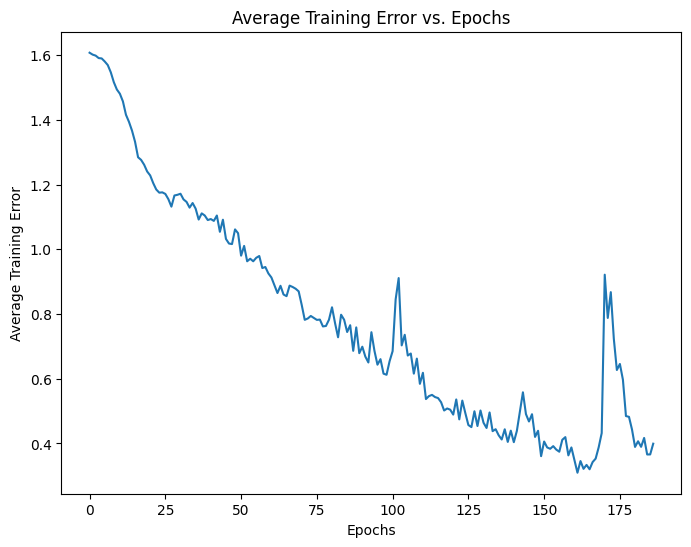

In [ ]:
es1= EarlyStopping(monitor='loss',min_delta=0.0001, patience=25,verbose=1)
#Model Architecture1
mask_value=0.0
model1 = Sequential()
model1.add(Masking(mask_value=mask_value, input_shape=(161, 2)))
model1.add(LSTM(units=32,return_sequences=True))
model1.add(Dropout(0.2))
model1.add(LSTM(units=32,return_sequences=True))
model1.add(Dropout(0.2))
model1.add(LSTM(units=32))
model1.add(Dropout(0.2))
model1.add(Dense(units=5, activation='softmax'))
model1.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model1.summary()
history1=model1.fit(tensortrain, yt, callbacks=[es1],epochs=1000, batch_size=128)

#save Model weights
model1.save('/content/drive/MyDrive/DLA6/CV_SAVE_Model/lstm1.h5')

#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc1=model1.evaluate(x=tensortrain,y=yt,batch_size=1, verbose="auto",callbacks=None)
print(model1.metrics_names)
print(trainAcc1)
print('\nEvaluation of model on test data:')
testAcc1=model1.evaluate(x=tensortest, y=ytest, batch_size=1, verbose="auto",callbacks=None)
print(model1.metrics_names)
print(testAcc1)


#Confusion Matrix
print('\nPredictions for test data:')
testProb1=model1.predict(tensortest, batch_size=1, verbose="auto", callbacks=None)
pred1=np.argmax(testProb1,axis=1)
confusionMatrix1=tf.math.confusion_matrix(ytest,pred1)
print(confusionMatrix1)


#Average Training Error vs. Epochs plotting
plt.figure(figsize=(8, 6))
#plt.plot(history8.history['accuracy'])
plt.plot(history1.history['loss'])
plt.title('Average Training Error vs. Epochs')
plt.ylabel('Average Training Error')
plt.xlabel('Epochs')
plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_2 (Masking)         (None, 161, 2)            0         
                                                                 
 lstm_6 (LSTM)               (None, 161, 64)           17152     
                                                                 
 dropout_4 (Dropout)         (None, 161, 64)           0         
                                                                 
 lstm_7 (LSTM)               (None, 161, 64)           33024     
                                                                 
 dropout_5 (Dropout)         (None, 161, 64)           0         
                                                                 
 lstm_8 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_6 (Dropout)         (None, 64)               

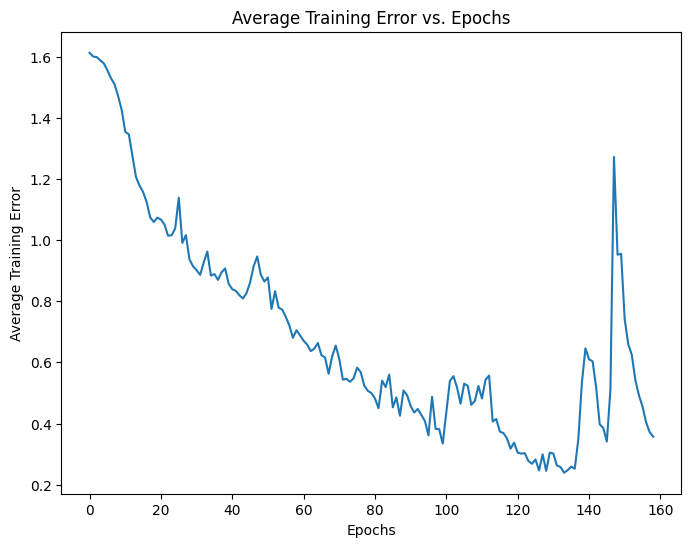

In [ ]:
es1= EarlyStopping(monitor='loss',min_delta=0.0001, patience=25,verbose=1)
#Model Architecture2
mask_value=0.0
model1 = Sequential()
model1.add(Masking(mask_value=mask_value, input_shape=(161, 2)))
model1.add(LSTM(units=64,return_sequences=True))
model1.add(Dropout(0.2))
model1.add(LSTM(units=64,return_sequences=True))
model1.add(Dropout(0.2))
model1.add(LSTM(units=64))
model1.add(Dropout(0.2))
model1.add(Dense(units=5, activation='softmax'))
model1.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model1.summary()
history1=model1.fit(tensortrain, yt, callbacks=[es1],epochs=1000, batch_size=128)

#save Model weights
model1.save('/content/drive/MyDrive/DLA6/CV_SAVE_Model/lstm2.h5')

#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc1=model1.evaluate(x=tensortrain,y=yt,batch_size=1, verbose="auto",callbacks=None)
print(model1.metrics_names)
print(trainAcc1)
print('\nEvaluation of model on test data:')
testAcc1=model1.evaluate(x=tensortest, y=ytest, batch_size=1, verbose="auto",callbacks=None)
print(model1.metrics_names)
print(testAcc1)


#Confusion Matrix
print('\nPredictions for test data:')
testProb1=model1.predict(tensortest, batch_size=1, verbose="auto", callbacks=None)
pred1=np.argmax(testProb1,axis=1)
confusionMatrix1=tf.math.confusion_matrix(ytest,pred1)
print(confusionMatrix1)


#Average Training Error vs. Epochs plotting
plt.figure(figsize=(8, 6))
#plt.plot(history8.history['accuracy'])
plt.plot(history1.history['loss'])
plt.title('Average Training Error vs. Epochs')
plt.ylabel('Average Training Error')
plt.xlabel('Epochs')
plt.show()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_4 (Masking)         (None, 161, 2)            0         
                                                                 
 lstm_12 (LSTM)              (None, 161, 128)          67072     
                                                                 
 dropout_10 (Dropout)        (None, 161, 128)          0         
                                                                 
 lstm_13 (LSTM)              (None, 161, 128)          131584    
                                                                 
 dropout_11 (Dropout)        (None, 161, 128)          0         
                                                                 
 lstm_14 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_12 (Dropout)        (None, 128)              

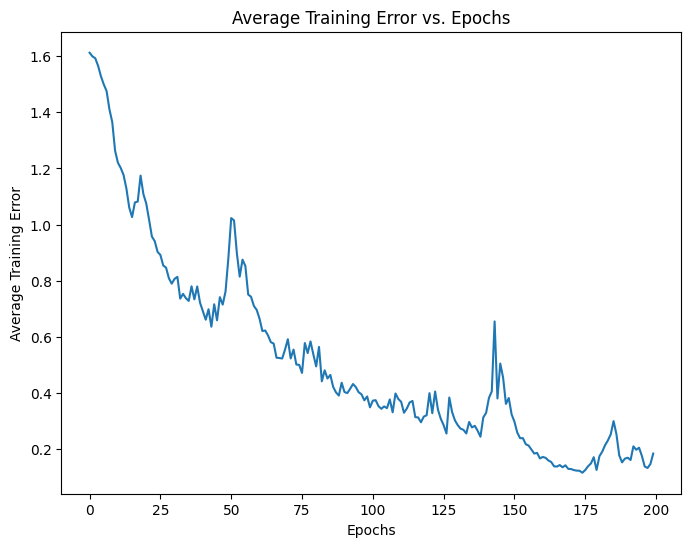

In [ ]:
es1= EarlyStopping(monitor='loss',min_delta=0.0001, patience=25,verbose=1)
#Model Architecture3
mask_value=0.0
model1 = Sequential()
model1.add(Masking(mask_value=mask_value, input_shape=(161, 2)))
model1.add(LSTM(units=128,return_sequences=True))
model1.add(Dropout(0.2))
model1.add(LSTM(units=128,return_sequences=True))
model1.add(Dropout(0.2))
model1.add(LSTM(units=128))
model1.add(Dropout(0.2))
model1.add(Dense(units=5, activation='softmax'))
model1.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model1.summary()
history1=model1.fit(tensortrain, yt, callbacks=[es1],epochs=1000, batch_size=128)

#save Model weights
model1.save('/content/drive/MyDrive/DLA6/CV_SAVE_Model/lstm3.h5')

#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc1=model1.evaluate(x=tensortrain,y=yt,batch_size=1, verbose="auto",callbacks=None)
print(model1.metrics_names)
print(trainAcc1)
print('\nEvaluation of model on test data:')
testAcc1=model1.evaluate(x=tensortest, y=ytest, batch_size=1, verbose="auto",callbacks=None)
print(model1.metrics_names)
print(testAcc1)


#Confusion Matrix
print('\nPredictions for test data:')
testProb1=model1.predict(tensortest, batch_size=1, verbose="auto", callbacks=None)
pred1=np.argmax(testProb1,axis=1)
confusionMatrix1=tf.math.confusion_matrix(ytest,pred1)
print(confusionMatrix1)


#Average Training Error vs. Epochs plotting
plt.figure(figsize=(8, 6))
#plt.plot(history8.history['accuracy'])
plt.plot(history1.history['loss'])
plt.title('Average Training Error vs. Epochs')
plt.ylabel('Average Training Error')
plt.xlabel('Epochs')
plt.show()